# Data 601 - An Investigation into Sleep Behaviours
## Group 15
Josh Brauner, Raahim Salman, Ze Yu


## Introduction

Sleep is a critical part of our lives, occupying about one-third of our lifespan. It is critical to physical health, mental well-being, cognitive performance, and safety. Benefits of sleep also are stacked with a reduction in risks of Sleep Behaviour Disorder.
The ISRUC-Sleep dataset is a resource for researchers interested in the field of sleep studies. This polysomnographic (PSG) dataset was compiled to facilitate a wide range of investigations into sleep patterns, disorders, and the effects of medication on sleep. Comprising data from 100 human adults, including both healthy subjects and those diagnosed with sleep disorders, the dataset is structured to support various research objectives and methodologies.

### Motivations for Researching Sleep

Researching sleep is crucial for several reasons, reflecting the central role of sleep in human health and well-being:

-   **Understanding Sleep Disorders**: With a wide prevalence of sleep disorders across the global population, understanding the nuances of these conditions is vital for developing effective treatments. The ISRUC-Sleep dataset allows researchers to study the specific patterns and anomalies associated with different disorders.

-   **Impact on Health**: Sleep has profound effects on physical health, mental health, and cognitive function. Research can uncover how variations in sleep patterns affect these areas, leading to improved guidelines for healthy sleep and interventions for sleep-related health issues.

In summary, the ISRUC-Sleep dataset is a foundational tool for advancing our understanding of sleep and its complex interplay with human health. It enables researchers to explore questions related to sleep physiology, disorders, treatment effects, and beyond, with the ultimate goal of enhancing sleep quality and health outcomes for individuals around the world.

## Guiding Questions

- How do age and gender affect sleep hours? 

Currently, there are recommendations (citation) for the amount of sleep someone should be getting based on their age group. Answering this question will allow a comparison between the recommended amount and the actual amount that people sleep and see if there is a specific age group or gender that is more likely to have their sleep hours fall outside the recommended rangof sleep? 

- What other factors impact sleep quality? 

This will be a comparison of the various health and in the database to a person’s quality of sleep. Quality of sleep will be assessed by comparing different proportions of sleep stages as well as total sleep time against current recommendations.

- How does health status (such as BMI) impact sleep hours and resting heart rate? 

- How do sleep disorders impact quality and hours of sleep?

## Dataset

### Dataset Overview

A polysomnographic (PSG) dataset named ISRUC-Sleep that was created aiming to help sleep researchers in their studies. The data were obtained from human adults, including healthy subjects, and subjects with sleep disorders under the effect of sleep medication. The dataset is organized into three main groups, each tailored to address different research needs:

1.  **General Population Data**: It includes one recording session per subject across 100 subjects, offering a broad overview of sleep characteristics in a diverse population.The PSG recordings, associated with each subject, were visually scored by two human experts. The PSG recordings include electrophysiological signals, pneumological signals, and another contextual information of the subjects.

2.  **Healthy Subjects Data**: This subset focuses on 10 healthy individuals, allowing for detailed comparisons between healthy sleep patterns and those affected by sleep disorders.

3.  **Sleep Stages and Events**: The data contains epoch-by-epoch annotations of sleep stages (Awake, NREM stages N1, N2, N3, and REM) based on the American Academy of Sleep Medicine (AASM) criteria, as well as various sleep-related events and physiological signals (e.g., heart rate, blood-oxygen saturation).

**Important attributes in this dataset**:

Epoch: a standard 30 second of recording

Stage: sleep Stage. Human sleep occurs in periods of approximately 90 minutes, The American Academy of Sleep Medicine (AASM) determined a criteria in the scoring of sleep based on the R&K rules. In adults, sleep-wake cycle is categorized in awake (W), non-rapid eye movement (NREM) and rapid eye movement (REM) sleep stages. NREM sleep is further divided into three stages: N1, N2 and N3, the last of which is also called delta sleep or slow wave sleep (SWS). These stages progress cyclically N1 → N2 → N3 → N2 → REM.

SaO2: A blood-oxygen saturation reading indicates the percentage of hemoglobin molecules in the arterial blood which are saturated with oxygen

HR: Heart Rate

BPOS: Body Position

Events: Events occur during the recording, includes: L Out (Lights turn off), L ON (Lights turn on), MChg (Montage Change), PLM (Periodic Leg Movement), Awake (Awakening), CH (Central Hypopnea), CA (Central Apnea), LM (Leg Movement), MP (Movement Periodic), OH (Obstructive Hypopnea), OA (Obstructive Apnea), REM_Aw (Awakening in REM), AR (Arousal, abrupt change from sleep to wakefulness, or from a "deeper" stage of nonREM sleep to a "lighter" stage.), MH (Mixed Hypopnea)


1. `summary_data.csv` - Information about diseased individuals.
2. `summary_data_subgroup_3.csv` - Information about healthy individuals.
3. `sleep_stage_output.csv` - Details on sleep stages.
4. `event_stage_output.csv` - Details on sleep-related events.

Here's a brief overview of their structures:

- `summary_data.csv` and `summary_data_subgroup_3.csv` both contain columns for subject ID, expert evaluation, date of study, measurements (height, weight), age, sex, various sleep metrics (like total epoch, min/max SpO2 and HR), and summaries of body position, sleep stages, and events.
- `sleep_stage_output.csv` provides detailed information on the number of epochs spent in each sleep stage (W, N1, N2, N3, REM), with some columns potentially unused or mislabeled (e.g., 'n2', 'U', 'N').
- `event_stage_output.csv` is extensive, focusing on various sleep-related events, with many columns indicating specific event counts, some of which may be mislabeled or not applicable to all rows, indicating a wide range of event types captured.

The visualizations will include:

1. **Comparison of sleep hours by age and gender** from the summary data. This will likely involve aggregating data to calculate average sleep hours for different age and gender groups.
2. **Factors impacting sleep quality**, using sleep stage proportions from `sleep_stage_output.csv`.
3. **Health status (BMI) impact on sleep hours and resting heart rate**, requiring calculations of average metrics for groups based on BMI.
4. **Impact of sleep disorders on quality and hours of sleep**, using the events summary from `summary_data.csv` and `summary_data_subgroup_3.csv`.



## Data Wrangling

The ISRUC-Sleep dataset contains 100 subjects. To observe a person's whole sleep, we have hundreds of recordings for a subject since we used a standard of 30 second. We summarize the data and events for each subject and put the summarized data of the one hundred subjects into a csv file. In the summary dataset we introduced attributes for each subject that can be used for visualization, like: Total_Epoch, Min/Max/Avg HR, Min/Max/Avg SpO2, BPOS_Summery, Stage_Summery and Events_Summery.

In [23]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from ast import literal_eval

pd.set_option("mode.copy_on_write", True)

In [6]:
def extract_demographics(df, n, a):
    # Initialize dictionary to hold demographic data with placeholders for easier mapping
    demographic_data = {
        'ID': n,
        'Expert' : a,
        'Date': None,
        'Height_in': None,
        'Height_cm': None,
        'Weight_lbs': None,
        'Weight_kg': None,
        'Age': None,
        'Sex': None
    }
    if a == 2:
        return demographic_data

    empty = False

    for col in df.columns[-15:]:
        for index in range(20):
            cell_value = str(df.at[index, col]).strip()
            if 'DATE:' in cell_value:
                    col_index = df.columns.get_loc(col)
                    
                    # Extract and convert Date to datetime
                    date_str = df.iat[index, col_index + 1]
                    demographic_data['Date'] = pd.to_datetime(date_str, errors='coerce', dayfirst=True)
                    
                    height_in_str = df.iat[index + 1, col_index + 1]
                    weight_lbs_str = df.iat[index + 3, col_index + 1]


                    if (len(height_in_str) != 5):
                        empty = True
                        print(f"Failed to extract demographic data from Subgroup_I_{n}_{a}.xlsx -- Height = {height_in_str} - Weight = {weight_lbs_str}")
                    
                    if not empty:
                        try:
                            demographic_data['Height_in'] = float(height_in_str.split()[0]) if height_in_str else None
                            
                            # Extract Height in cm, remove 'cm', and convert to float
                            height_cm_str = df.iat[index + 2, col_index + 1]
                            demographic_data['Height_cm'] = float(height_cm_str.split()[0]) if height_cm_str else None
                                                    
                            # Extract Weight in lbs, remove 'lbs', and convert to float
                            weight_lbs_str = df.iat[index + 3, col_index + 1]
                            demographic_data['Weight_lbs'] = float(weight_lbs_str.split()[0]) if weight_lbs_str else None
                        
                            # Extract Weight in kg, remove 'kg', and convert to float
                            weight_kg_str = df.iat[index + 4, col_index + 1]
                            demographic_data['Weight_kg'] = float(weight_kg_str.split()[0]) if (weight_kg_str and len(weight_kg_str) > 2) else None
                            
                            # Extract Age and convert to integer
                            age_str = df.iat[index + 5, col_index + 1]
                            demographic_data['Age'] = int(age_str)
                            
                            # Extract Sex
                            demographic_data['Sex'] = df.iat[index + 6, col_index + 1].strip()
                        
                        except Exception as e:
                            print(f"Failed to extract demographic data from Subgroup_I_{n}_{a}.xlsx - {e}")

                    
                    break  # Break the loop once all demographic data is extracted
        if demographic_data['Date'] is not None:
            break

    return demographic_data


# Initialize a list to store all records
all_records = []

for n in range(1, 101):  
    for a in range(1, 3):  
        ##################### ADJUST PATH ###############################
        file_name = f"Data/Subgroup_I_{n}_{a}.xlsx"
        try:
            df = pd.read_excel(file_name)
            
            # Convert 'SpO2' and 'HR' columns to numeric, coercing errors to NaN
            df['SpO2'] = pd.to_numeric(df['SpO2'], errors='coerce')
            df['HR'] = pd.to_numeric(df['HR'], errors='coerce')

            # Convert "Events" to a categorical type
            df['Events'] = df['Events'].astype('category')
            
            # Extract demographic information
            demographics = extract_demographics(df, n, a)  
            
            # Filter the DataFrame based on 'SpO2' and 'HR'
            filtered_df = df[(df['SpO2'] > 0) & (df['HR'] > 0)]
            
            # Calculate total epochs, average SpO2, and average HR
            tot_Epoch = filtered_df['Epoch'].count()
            avg_SpO2 = filtered_df['SpO2'].mean()
            avg_HR = filtered_df['HR'].mean()
            min_SpO2 = filtered_df['SpO2'].min()
            min_HR = filtered_df['HR'].min()
            max_SpO2 = filtered_df['SpO2'].max()
            max_HR = filtered_df['HR'].max()
            
            # Summarize 'BPOS', 'Stage', and now 'Events' as well
            bpos_counts = filtered_df['BPOS'].value_counts().to_dict()
            stage_counts = filtered_df['Stage'].value_counts().to_dict()
            events_summary = filtered_df['Events'].value_counts().to_dict()  
            
            # Combine all extracted data into a record
            record = {
                **demographics,
                
                'Total_Epoch': tot_Epoch,
                'Min_SpO2': min_SpO2,
                'Min_HR': min_HR,
                'Max_SpO2': max_SpO2,
                'Max_HR': max_HR,
                'Average_SpO2': avg_SpO2,
                'Average_HR': avg_HR,
                'BPOS_Summary': bpos_counts,
                'Stage_Summary': stage_counts,
                'Events_Summary': events_summary  
            }
            all_records.append(record)
        except Exception as e:
            print(f"Failed to process {file_name}: {e}")

# Convert the list of dictionaries to a DataFrame
final_df = pd.DataFrame(all_records)
print(final_df.head())

# Specify the desired output CSV file path
output_csv_path = 'summary_data_subgroup_3.csv'
# final_df.to_csv(output_csv_path, index=False)

# print(f"Data successfully written to {output_csv_path}")

Failed to extract demographic data from Subgroup_I_7_1.xlsx -- Height = 0 in - Weight = nan
Failed to extract demographic data from Subgroup_I_10_1.xlsx -- Height = in - Weight = lbs
Failed to extract demographic data from Subgroup_I_17_1.xlsx -- Height = 180 in - Weight = 90 lbs
Failed to extract demographic data from Subgroup_I_21_1.xlsx -- Height = in - Weight = lbs
Failed to extract demographic data from Subgroup_I_23_1.xlsx -- Height = 152 in - Weight = 116 lbs
Failed to extract demographic data from Subgroup_I_27_1.xlsx -- Height = in - Weight = lbs
Failed to extract demographic data from Subgroup_I_32_1.xlsx -- Height = in - Weight = lbs
Failed to extract demographic data from Subgroup_I_33_1.xlsx -- Height = 1 in - Weight = 311 lbs
Failed to extract demographic data from Subgroup_I_41_1.xlsx - 'float' object has no attribute 'strip'
Failed to extract demographic data from Subgroup_I_48_1.xlsx -- Height = in - Weight = lbs
Failed to extract demographic data from Subgroup_I_49_1.

In [15]:
def refine_data_for_analysis(csv_name, health_status):
    df = pd.read_csv(csv_name)

    df['Stage_Summary'] = df['Stage_Summary'].apply(lambda x: literal_eval(x))

    stage_summary_expanded = pd.json_normalize(df['Stage_Summary'])

    # Drop the 'BPOS_Summary', 'Events_Summary', and original 'Stage_Summary' columns
    df = df.drop(['BPOS_Summary', 'Events_Summary', 'Stage_Summary'], axis=1)

    # Combine the expanded stage summary with the original DataFrame, now without the dropped columns
    df_combined = pd.concat([df, stage_summary_expanded], axis=1)

    # Assuming 'ID' and 'Sex' are not included in the mean calculation
    numeric_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns.difference(['ID'])
    df_grouped = df_combined.groupby('ID')[numeric_cols].mean().reset_index()

    # Merge non-numeric data ('Sex') back into the grouped DataFrame
    df_final = pd.merge(df_grouped, df[['ID', 'Sex']].drop_duplicates('ID'), on='ID', how='left')

    df_final["Health_Status"] = health_status

    return df_final


## Analysis

In [17]:
summary_data_healthy = refine_data_for_analysis("summary_data_subgroup_3.csv", "Healthy")
summary_data_diseased = refine_data_for_analysis("summary_data.csv", "Diseased")

display(summary_data_diseased.head())
print(summary_data_diseased.dtypes)
display(summary_data_healthy.head())
print(summary_data_healthy.dtypes)

,ID,Age,Average_HR,Average_SpO2,Expert,Height_cm,Height_in,Max_HR,Max_SpO2,Min_HR,...,N3,R,Total_Epoch,U,W,Weight_kg,Weight_lbs,n2,Sex,Health_Status
0,1,64.0,63.200229,93.279976,1.5,172.0,68.0,91.0,99.0,52.0,...,228.0,118.5,871.5,NaN,266.0,83.0,183.0,NaN,Male,Diseased
1,2,52.0,66.961602,95.410666,1.5,174.0,69.0,162.0,98.0,57.0,...,131.0,102.0,937.5,NaN,216.5,98.0,216.0,1.0,Male,Diseased
2,3,38.0,67.842759,99.301901,1.5,172.0,68.0,99.0,100.0,53.0,...,159.5,239.0,922.5,2.0,112.0,63.0,139.0,NaN,Male,Diseased
3,4,27.0,59.204995,94.752488,1.5,178.0,70.0,152.0,97.0,47.0,...,154.0,28.0,320.5,1.0,6.0,76.0,168.0,NaN,Male,Diseased
4,5,58.0,53.651972,97.512307,1.5,145.0,57.0,122.0,100.0,44.0,...,164.5,43.5,873.5,NaN,302.5,60.0,132.0,NaN,Female,Diseased


ID                 int64
Age              float64
Average_HR       float64
Average_SpO2     float64
Expert           float64
Height_cm        float64
Height_in        float64
Max_HR           float64
Max_SpO2         float64
Min_HR           float64
Min_SpO2         float64
N                float64
N1               float64
N2               float64
N3               float64
R                float64
Total_Epoch      float64
U                float64
W                float64
Weight_kg        float64
Weight_lbs       float64
n2               float64
Sex               object
Health_Status     object
dtype: object


,ID,Age,Average_HR,Average_SpO2,Expert,Height_cm,Height_in,Max_HR,Max_SpO2,Min_HR,...,N1,N2,N3,R,Total_Epoch,W,Weight_kg,Weight_lbs,Sex,Health_Status
0,1,30.0,69.615752,97.903162,1.5,NaN,NaN,186.0,100.0,53.0,...,56.0,248.5,104.5,106.0,568.0,53.0,NaN,NaN,Male,Healthy
1,2,41.0,70.232478,94.726211,1.5,175.0,69.0,143.0,98.0,58.0,...,107.5,299.5,219.5,156.0,871.0,88.5,90.0,198.0,Male,Healthy
2,3,52.0,59.689853,94.523809,1.5,176.0,69.0,123.0,98.0,50.0,...,68.0,254.0,302.5,110.5,819.0,84.0,85.0,187.0,Male,Healthy
3,4,58.0,70.127568,97.040591,1.5,NaN,NaN,129.0,100.0,55.0,...,132.5,224.0,158.5,107.5,776.0,153.5,NaN,NaN,Male,Healthy
4,5,49.0,83.739674,96.514322,1.5,170.0,67.0,186.0,98.0,70.0,...,76.0,295.0,167.0,88.0,888.5,262.5,72.0,159.0,Female,Healthy


ID                 int64
Age              float64
Average_HR       float64
Average_SpO2     float64
Expert           float64
Height_cm        float64
Height_in        float64
Max_HR           float64
Max_SpO2         float64
Min_HR           float64
Min_SpO2         float64
N1               float64
N2               float64
N3               float64
R                float64
Total_Epoch      float64
W                float64
Weight_kg        float64
Weight_lbs       float64
Sex               object
Health_Status     object
dtype: object


## How do age and gender affect sleep hours? 

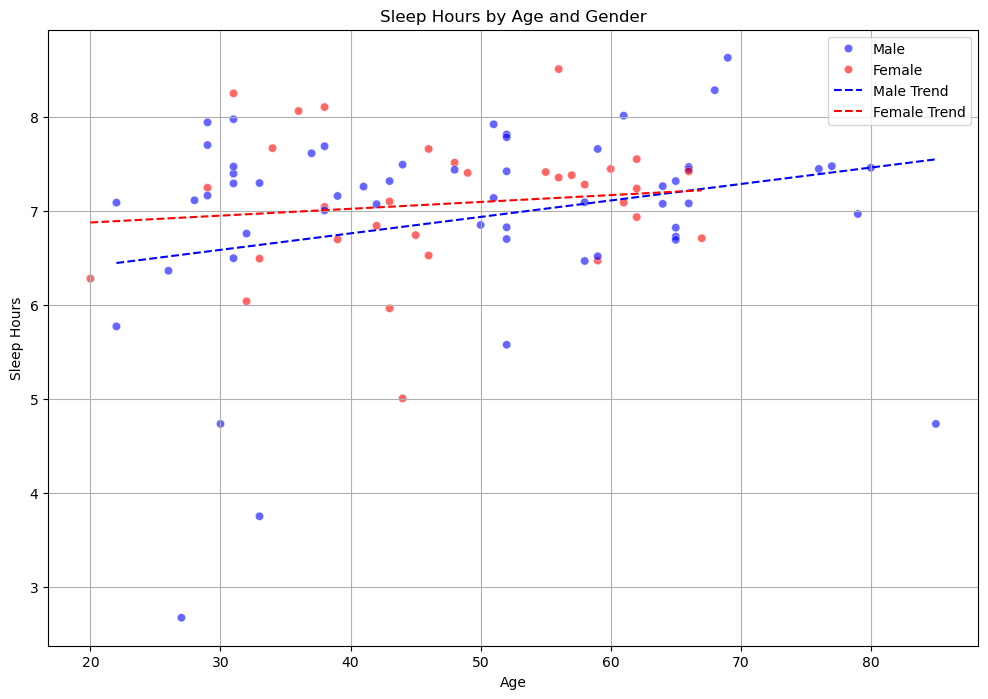

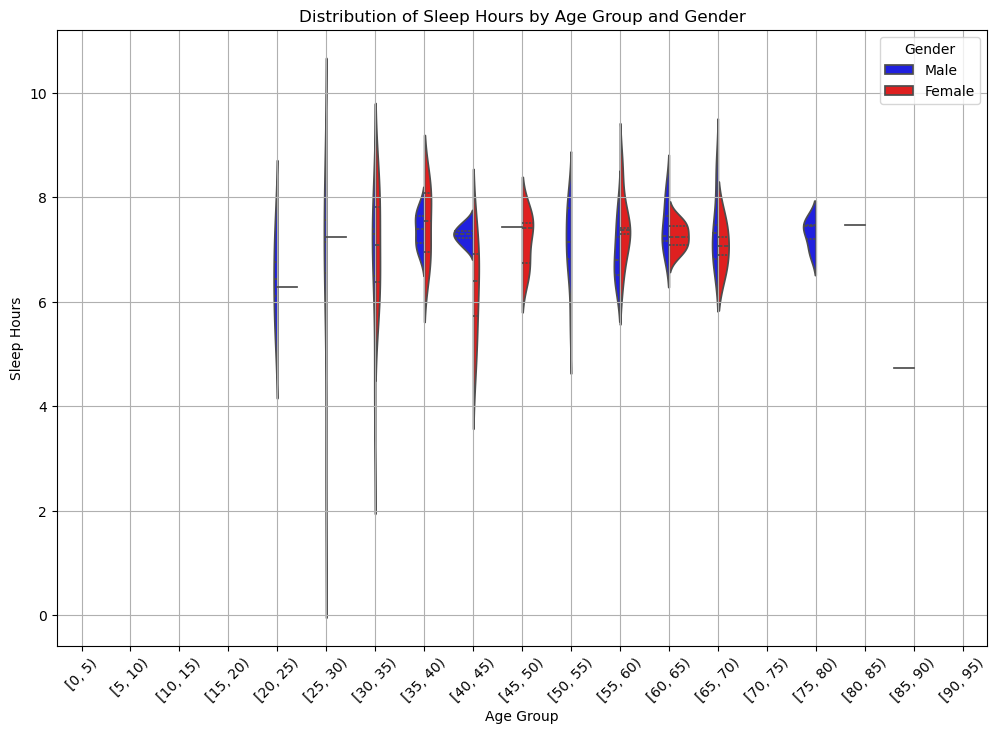

In [29]:
# Combine both dataframes
combined_df = pd.concat([summary_data_diseased, summary_data_healthy], ignore_index=True)

# Calculate Sleep Hours based on Total_Epoch
combined_df['Sleep_Hours'] = combined_df['Total_Epoch'] * 30 / 3600

# Create a scatter plot for sleep hours vs. age, colored by gender
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_df, x='Age', y='Sleep_Hours', hue='Sex', alpha=0.6, palette={'Male': 'blue', 'Female': 'red'})

# Calculate and plot trend lines for each gender
for sex, color in [('Male', 'blue'), ('Female', 'red')]:
    # Filter data by gender
    subset = combined_df[combined_df['Sex'] == sex]
    
    # Group by age to calculate mean sleep hours for plotting trend lines
    grouped = subset.groupby('Age')['Sleep_Hours'].mean().reset_index()
    
    # Fit a linear regression for trend line
    slope, intercept, r_value, p_value, std_err = linregress(grouped['Age'], grouped['Sleep_Hours'])
    
    # Generate ages for trend line
    ages = np.linspace(grouped['Age'].min(), grouped['Age'].max(), 100)
    
    # Calculate sleep hours from regression
    sleep_hours_trend = slope * ages + intercept
    
    # Plot trend line
    plt.plot(ages, sleep_hours_trend, label=f'{sex} Trend', color=color, linestyle='--')

plt.title('Sleep Hours by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Sleep Hours')
plt.legend()
plt.grid(True)
plt.show()

# Bin ages for grouped analysis
combined_df['Age_Group'] = pd.cut(combined_df['Age'], bins=np.arange(0, 100, 5), right=False)

plt.figure(figsize=(12, 8))
sns.violinplot(data=combined_df, x='Age_Group', y='Sleep_Hours', hue='Sex', split=True, inner='quart', palette={'Male': 'blue', 'Female': 'red'})
plt.xticks(rotation=45)
plt.title('Distribution of Sleep Hours by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Sleep Hours')
plt.legend(title='Gender')
plt.grid(True)
plt.show()


### Interpretation of the Scatter Plot with Trend Lines:
- **Age Trend**: There appears to be a slight positive correlation between age and sleep hours for both genders. As age increases, the average sleep hours also seem to increase slightly.
- **Gender Differences**: The trend lines for males and females are quite close, indicating that the average sleep hours for both genders are similar across the age spectrum. However, the male trend line is consistently above the female trend line, suggesting that on average, males may have slightly longer sleep hours than females.
- **Data Spread**: The scatter plot points indicate considerable variability in sleep hours among individuals, with some outliers, especially in the younger and older age ranges.

### Interpretation of the Violin Plot:
- **Distribution Characteristics**: The violin plot shows that the distribution of sleep hours is quite wide for younger age groups, indicating variability in sleep patterns among younger individuals. As the age increases, the distribution narrows, suggesting more consistency in sleep duration among older individuals.
- **Age and Gender**: For most age groups, the distributions for males and females have similar shapes, which corresponds with the trend lines seen in the scatter plot. There is some noticeable difference in the middle age groups, where the distribution for females shows a slightly wider spread, indicating more variability in sleep hours among females.
- **Median Sleep Hours**: The median sleep hours, indicated by the white dot in the center of each violin, do not appear to vary dramatically between males and females within the same age group. However, the median seems to shift slightly higher with age for both genders.

### Conclusions:
- **Sleep Duration and Age**: There is a trend of increasing sleep hours with age for both genders, although the increase is quite modest.
- **Gender Differences**: While males and females show similar patterns of sleep duration with age, males may have a marginally higher average sleep duration than females.
- **Variability**: Younger individuals show a greater diversity in sleep hours, which could be influenced by lifestyle factors, work/study schedules, or health conditions. The variability in sleep hours decreases with age.
- **Overall Consistency**: Both genders show consistency in sleep patterns, especially in older age groups, which may reflect more stable lifestyle routines or biological factors influencing sleep.

## What other factors impact sleep quality? 

## How does health status (such as BMI) impact sleep hours and resting heart rate? 

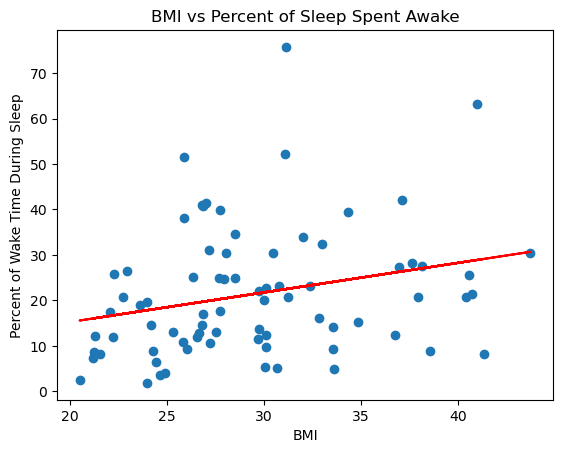

In [11]:
# plots

# BMI vs Percent of Sleep Spent Awake
plt.scatter(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         100*summary_sg1["W"]/summary_sg1["Total_Epoch"])
plt.xlabel("BMI")
plt.ylabel("Percent of Wake Time During Sleep")
plt.title("BMI vs Percent of Sleep Spent Awake")

# line of best fit
a, b = np.polyfit(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         100*summary_sg1["W"]/summary_sg1["Total_Epoch"], 1)

plt.plot(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         a*(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2)) + b,
         color='red')

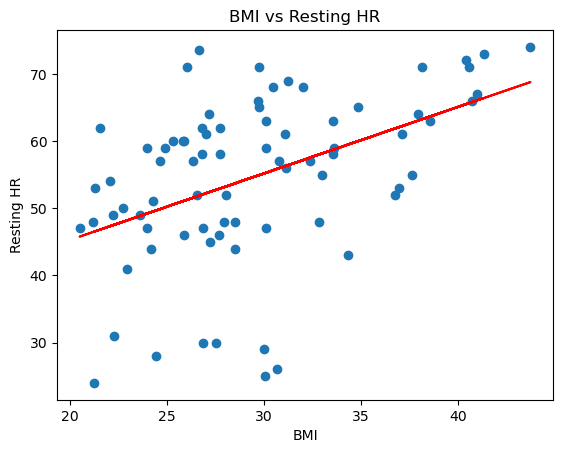

In [12]:
# BMI vs RHR
plt.scatter(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         summary_sg1["Min_HR"])
plt.xlabel("BMI")
plt.ylabel("Resting HR")
plt.title("BMI vs Resting HR")

# line of best fit
a, b = np.polyfit(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         summary_sg1["Min_HR"], 1)

plt.plot(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2),
         a*(summary_sg1["Weight_kg"]/((summary_sg1["Height_cm"]/100)**2)) + b,
         color='red')

## How do sleep disorders impact quality and hours of sleep? 

## Conclusion

ToDo: Add conclusion

## References

Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. Computing in science &amp; engineering, 9(3), pp. 

Kluyver, T. et al., 2016. Jupyter Notebooks – a publishing format for reproducible computational workflows. In F. Loizides & B. Schmidt, eds. Positioning and Power in Academic Publishing: Players, Agents and Agendas. pp. 87–90

Khalighi Sirvan, Teresa Sousa, José Moutinho Santos, and Urbano Nunes. “ISRUC-Sleep: A comprehensive public dataset for sleep researchers.“Computer methods and programs in biomedicine 124 (2016): 180-192. Available at: https://sleeptight.isr.uc.pt 